In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")


In [8]:
# Load the dataset
path = './kaggle/input/voicegender/voice.csv'
data = pd.read_csv(path)

# Convert labels from categorical to numerical
data['label'] = data['label'].replace(['male', 'female'], [0, 1])

# Remove duplicates
data = data.drop_duplicates()

# Split the dataset into features and target variable
x = data.drop('label', axis=1)
y = data['label']


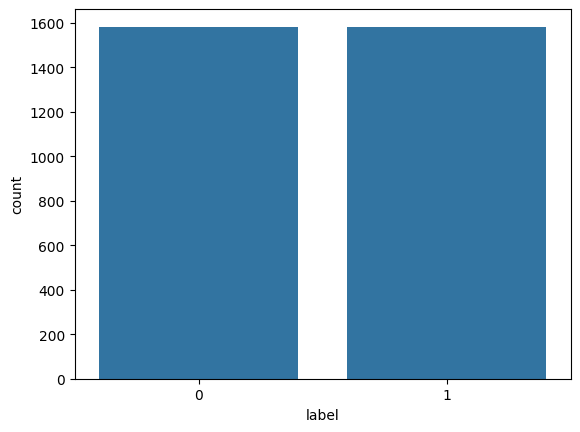

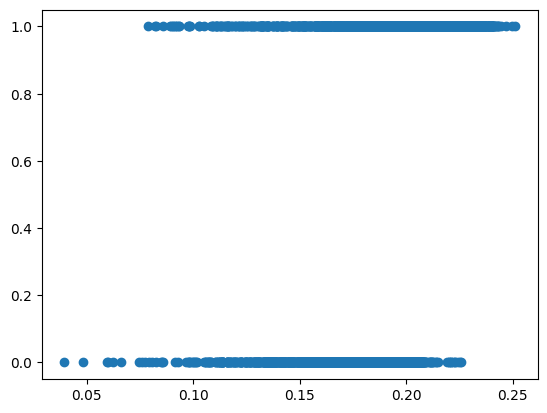

In [9]:
# Visualize the distribution of labels
sns.countplot(x='label', data=data)
plt.show()

# Scatter plot for mean frequency vs. label
plt.scatter(x=data['meanfreq'], y=data['label'])
plt.show()


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.30)


In [11]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

Accuracy: 0.8252631578947368


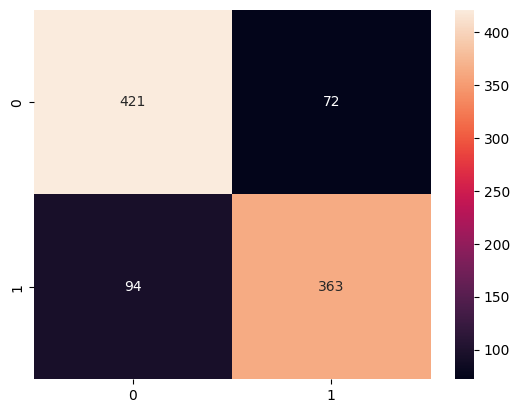

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       493
           1       0.83      0.79      0.81       457

    accuracy                           0.83       950
   macro avg       0.83      0.82      0.82       950
weighted avg       0.83      0.83      0.83       950



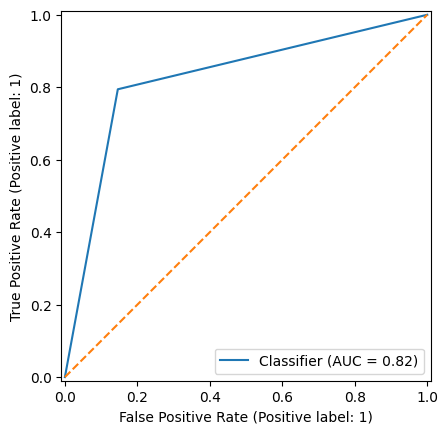

In [12]:
# Predictions
y_pred = lr.predict(x_test)

# Accuracy
print("Accuracy:", lr.score(x_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')  # Add a dashed line for reference
plt.show()
